In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import geopandas as gpd
from shapely.geometry import Point, Polygon 
plt.style.use('ggplot')

In [3]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-21-2020.csv'
#file_path = os.path.join("data","covid")
#csv_path_hop = os.path.join(file_path,"hopkins-data.csv")

In [4]:
df_hop = pd.read_csv(url)
df_hop

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-10-22 04:24:27,33.939110,67.709953,40510,1501,33824,5185.0,Afghanistan,104.063001,3.705258
1,NaN,NaN,NaN,Albania,2020-10-22 04:24:27,41.153300,20.168300,17948,462,10341,7145.0,Albania,623.670860,2.574103
2,NaN,NaN,NaN,Algeria,2020-10-22 04:24:27,28.033900,1.659600,55081,1880,38482,14719.0,Algeria,125.609327,3.413155
3,NaN,NaN,NaN,Andorra,2020-10-22 04:24:27,42.506300,1.521800,3811,63,2470,1278.0,Andorra,4932.375591,1.653109
4,NaN,NaN,NaN,Angola,2020-10-22 04:24:27,-11.202700,17.873900,8338,255,3040,5043.0,Angola,25.369476,3.058287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,NaN,NaN,NaN,West Bank and Gaza,2020-10-22 04:24:27,31.952200,35.233200,48628,427,41935,6266.0,West Bank and Gaza,953.225536,0.878095
3954,NaN,NaN,NaN,Western Sahara,2020-10-22 04:24:27,24.215500,-12.885800,10,1,8,1.0,Western Sahara,1.674116,10.000000
3955,NaN,NaN,NaN,Yemen,2020-10-22 04:24:27,15.552727,48.516388,2057,597,1344,116.0,Yemen,6.896675,29.022849
3956,NaN,NaN,NaN,Zambia,2020-10-22 04:24:27,-13.133897,27.849332,16000,346,15168,486.0,Zambia,87.032410,2.162500


In [5]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

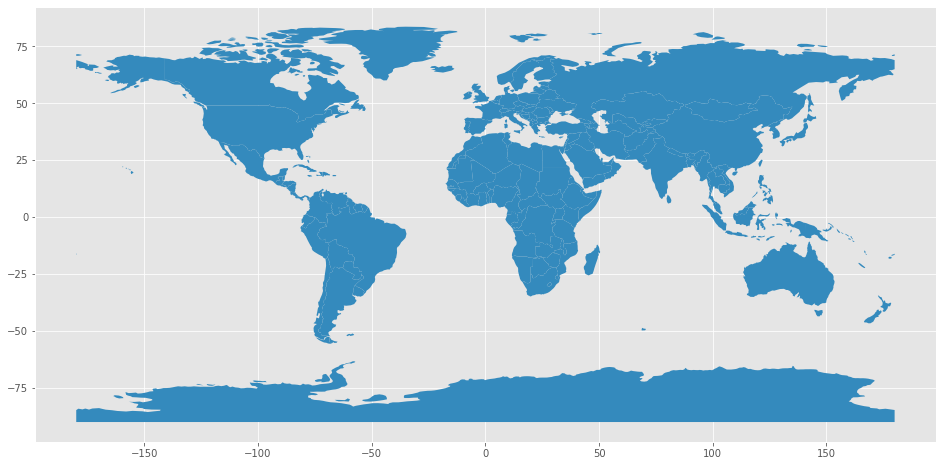

In [6]:
world.plot(figsize=(20,8))

In [7]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    int64   
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    float64 
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


In [8]:
world.groupby('continent')['name'].count()

continent
Africa                     51
Antarctica                  1
Asia                       47
Europe                     39
North America              18
Oceania                     7
Seven seas (open ocean)     1
South America              13
Name: name, dtype: int64

In [9]:
eur_mask = world['continent'] == 'Europe'
world.loc[eur_mask]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516..."
21,5320045,Europe,Norway,-99,364700.0,"MULTIPOLYGON (((15.143 79.674, 15.523 80.016, ..."
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ..."
110,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((11.027 58.856, 11.468 59.432, 12.300..."
111,9549747,Europe,Belarus,BLR,165400.0,"POLYGON ((28.177 56.169, 29.230 55.918, 29.372..."
112,44033874,Europe,Ukraine,UKR,352600.0,"POLYGON ((31.786 52.102, 32.159 52.061, 32.412..."
113,38476269,Europe,Poland,POL,1052000.0,"POLYGON ((23.484 53.912, 23.528 53.470, 23.805..."
114,8754413,Europe,Austria,AUT,416600.0,"POLYGON ((16.980 48.123, 16.904 47.715, 16.341..."
115,9850845,Europe,Hungary,HUN,267600.0,"POLYGON ((22.086 48.422, 22.641 48.150, 22.711..."
116,3474121,Europe,Moldova,MDA,18540.0,"POLYGON ((26.619 48.221, 26.858 48.368, 27.523..."


In [10]:
world_new = world[eur_mask]
world_new = world_new.drop(world_new[world_new["name"]=='Russia'].index)
world_new.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 38 entries, 21 to 174
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     38 non-null     int64   
 1   continent   38 non-null     object  
 2   name        38 non-null     object  
 3   iso_a3      38 non-null     object  
 4   gdp_md_est  38 non-null     float64 
 5   geometry    38 non-null     geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 2.1+ KB


In [11]:
world_new.name.sort_values()

125             Albania
114             Austria
111             Belarus
129             Belgium
170    Bosnia and Herz.
122            Bulgaria
126             Croatia
153             Czechia
142             Denmark
120             Estonia
151             Finland
43               France
121             Germany
123              Greece
115             Hungary
144             Iceland
133             Ireland
141               Italy
174              Kosovo
119              Latvia
118           Lithuania
128          Luxembourg
171           Macedonia
116             Moldova
173          Montenegro
130         Netherlands
21               Norway
113              Poland
131            Portugal
117             Romania
172              Serbia
152            Slovakia
150            Slovenia
132               Spain
110              Sweden
127         Switzerland
112             Ukraine
143      United Kingdom
Name: name, dtype: object

In [12]:
eu = ['Austria','Belgium','Bulgaria','Croatia','Cyprus','Czechia','Denmark',
                'Estonia','Finland','France','Germany','Greece','Hungary',
                'Ireland','Italy','Latvia','Lithuania','Luxembourg','Malta',
                'Netherlands','Poland','Portugal','Romania','Slovakia',
                'Slovenia','Spain','Sweden','United Kingdom'
                ]


In [13]:
world_new = world_new.drop(world_new[~world_new["name"].isin(eu)].index)
world_new

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
110,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
113,38476269,Europe,Poland,POL,1052000.0,"POLYGON ((23.48413 53.91250, 23.52754 53.47012..."
114,8754413,Europe,Austria,AUT,416600.0,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."
115,9850845,Europe,Hungary,HUN,267600.0,"POLYGON ((22.08561 48.42226, 22.64082 48.15024..."
117,21529967,Europe,Romania,ROU,441000.0,"POLYGON ((28.23355 45.48828, 28.67978 45.30403..."
118,2823859,Europe,Lithuania,LTU,85620.0,"POLYGON ((26.49433 55.61511, 26.58828 55.16718..."
119,1944643,Europe,Latvia,LVA,50650.0,"POLYGON ((27.28818 57.47453, 27.77002 57.24426..."
120,1251581,Europe,Estonia,EST,38700.0,"POLYGON ((27.98113 59.47537, 27.98112 59.47537..."
121,80594017,Europe,Germany,DEU,3979000.0,"POLYGON ((14.11969 53.75703, 14.35332 53.24817..."


(-18.0, 35.0)

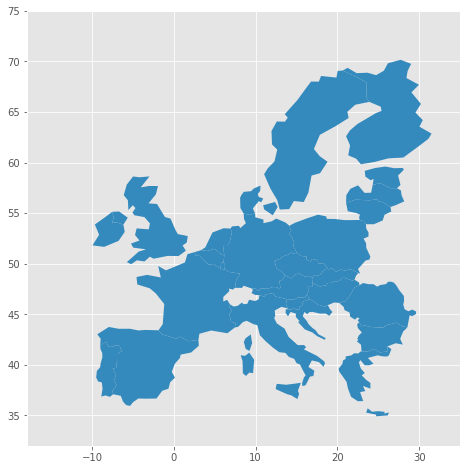

In [14]:
ax1 = world_new.plot(figsize=(20,8) )
ax1.set_ylim(32,75)
ax1.set_xlim(-18,35)

In [ ]:
#gdf = gpd.GeoDataFrame(
#    df_hop, geometry=gpd.points_from_xy(df_hop.Long_, df_hop.Lat))

In [15]:
df_hop.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')

In [16]:
df_hop_eu = df_hop.drop(df_hop[~df_hop["Country_Region"].isin(eu)].index)

In [17]:

df_hop_eu

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
16,NaN,NaN,NaN,Austria,2020-10-22 04:24:27,47.5162,14.550100,69409,925,52617,15867.0,Austria,770.663084,1.332680
23,NaN,NaN,NaN,Belgium,2020-10-22 04:24:27,50.8333,4.469936,253386,10539,21717,221130.0,Belgium,2186.319202,4.159267
58,NaN,NaN,NaN,Bulgaria,2020-10-22 04:24:27,42.7339,25.485800,33335,1048,17598,14689.0,Bulgaria,479.747627,3.143843
170,NaN,NaN,NaN,Croatia,2020-10-22 04:24:27,45.1000,15.200000,28287,393,21435,6459.0,Croatia,689.041495,1.389331
172,NaN,NaN,NaN,Cyprus,2020-10-22 04:24:27,35.1264,33.429900,2966,25,1444,1497.0,Cyprus,245.659749,0.842886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3944,NaN,NaN,Northern Ireland,United Kingdom,2020-10-22 04:24:27,54.7877,-6.492300,29992,629,0,29363.0,"Northern Ireland, United Kingdom",1593.962585,2.097226
3945,NaN,NaN,Scotland,United Kingdom,2020-10-22 04:24:27,56.4907,-4.202600,50903,2653,0,48250.0,"Scotland, United Kingdom",931.726246,5.211874
3946,NaN,NaN,Turks and Caicos Islands,United Kingdom,2020-10-22 04:24:27,21.6940,-71.797900,698,6,689,3.0,"Turks and Caicos Islands, United Kingdom",1802.779069,0.859599
3947,NaN,NaN,Unknown,United Kingdom,2020-10-22 04:24:27,NaN,NaN,0,0,0,0.0,"Unknown, United Kingdom",NaN,NaN


In [18]:
cols = [x for x in df_hop_eu.columns if x not in ['Country_Region','Lat','Long_','Confirmed']]
cols        

['FIPS',
 'Admin2',
 'Province_State',
 'Last_Update',
 'Deaths',
 'Recovered',
 'Active',
 'Combined_Key',
 'Incidence_Rate',
 'Case-Fatality_Ratio']

In [19]:
df_hop_eu = df_hop_eu.drop(cols,axis=1)
#df_hop_eu.dropna(axis=1,inplace=True)
df_hop_eu

,Country_Region,Lat,Long_,Confirmed
16,Austria,47.5162,14.550100,69409
23,Belgium,50.8333,4.469936,253386
58,Bulgaria,42.7339,25.485800,33335
170,Croatia,45.1000,15.200000,28287
172,Cyprus,35.1264,33.429900,2966
...,...,...,...,...
3944,United Kingdom,54.7877,-6.492300,29992
3945,United Kingdom,56.4907,-4.202600,50903
3946,United Kingdom,21.6940,-71.797900,698
3947,United Kingdom,NaN,NaN,0


In [39]:
df_hop_marker = (df_hop_eu['Confirmed'] /(df_hop_eu['Confirmed'].max())*1000)
df_hop_marker

16       71.892825
23      262.453506
58       34.527905
170      29.299260
172       3.072139
           ...    
3944     31.065274
3945     52.724582
3946      0.722978
3947      0.000000
3948     39.733762
Name: Confirmed, Length: 145, dtype: float64

In [40]:
gdf = gpd.GeoDataFrame(
    df_hop_eu, geometry=gpd.points_from_xy(df_hop_eu.Long_, df_hop_eu.Lat))

<AxesSubplot:>

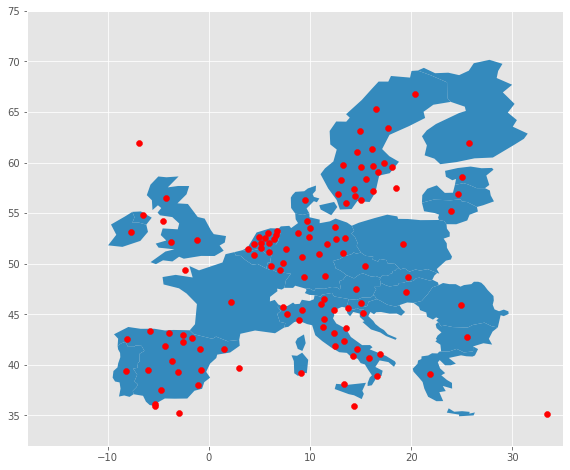

In [41]:
ax1 = world_new.plot(figsize=(20,8) )
ax1.set_ylim(32,75)
ax1.set_xlim(-18,35)

gdf.plot(ax=ax1, color='red')


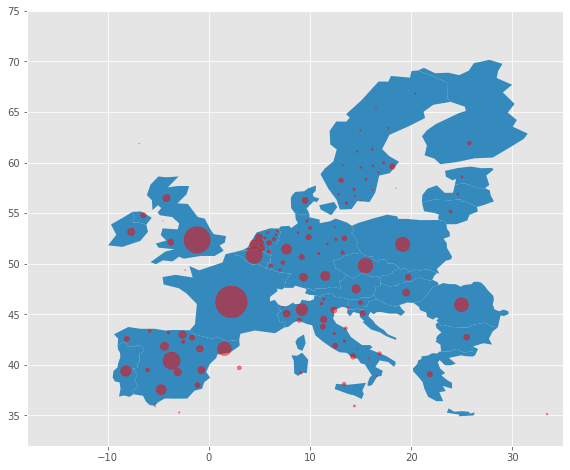

In [42]:
ax2 = world_new.plot(figsize=(20,8) )
ax2.set_ylim(32,75)
ax2.set_xlim(-18,35)


gdf.plot(ax=ax2, color='red',markersize=df_hop_marker,alpha=0.5)

    
plt.show()

In [158]:
eu_clean = df_hop_eu.groupby('Country_Region')['Confirmed'].sum().reset_index()
eu_lat = df_hop_eu.groupby('Country_Region')['Lat'].mean().reset_index()
eu_long = df_hop_eu.groupby('Country_Region')['Long_'].mean().reset_index()
#type(eu_total)
#eu_clean = pd.merge(eu_totals,eu_lat,how='inner')
eu_clean.set_index('Country_Region',inplace=True)
eu_lat.set_index('Country_Region',inplace=True)
eu_long.set_index('Country_Region',inplace=True)

In [159]:
eu_clean['Lat'] = eu_lat['Lat']
eu_clean['Long_'] =eu_long['Long_']
eu_clean.loc['United Kingdom',['Lat']] = 53
eu_clean.loc['United Kingdom',['Long_']] = -1.3
eu_clean.loc['France',['Lat']] = 47
eu_clean.loc['France',['Long_']] = 2
eu_clean.loc['Denmark',['Lat']] = 55.7
eu_clean.loc['Denmark',['Long_']] = 9
eu_clean.loc['Netherlands',['Lat']] = 52.5
eu_clean.loc['Netherlands',['Long_']] = 5.5

In [160]:
gdf = gpd.GeoDataFrame(
    eu_clean, geometry=gpd.points_from_xy(eu_clean.Long_, eu_clean.Lat))

In [161]:
marker = (eu_clean['Confirmed'] /(eu_clean['Confirmed'].max())*1000)

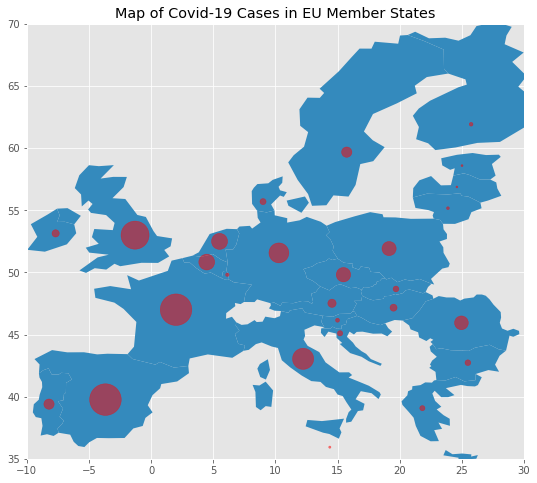

In [162]:
ax3 = world_new.plot(figsize=(20,8) )
ax3.set_ylim(35,70)
ax3.set_xlim(-10,30)
ax3.set_title('Map of Covid-19 Cases in EU Member States')

gdf.plot(ax=ax3, color='red',markersize=marker,alpha=0.5)

    
plt.show()

,Confirmed,Lat,Long_,geometry
Country_Region,,,,
Cyprus,2966,35.1264,33.4299,POINT (33.42990 35.12640)
Malta,5026,35.9375,14.3754,POINT (14.37540 35.93750)
